In [4]:
from sklearn.neighbors import BallTree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
from tqdm import tqdm_notebook
import pickle
from matplotlib.ticker import ScalarFormatter

In [5]:
data = pd.read_csv("new_db",delimiter ="\t",header=-1)#ненормированны
data1 = pd.read_csv("new_db_no_zeros.txt",delimiter ="\t",header=-1)#ненормированны

#data_test = pd.read_csv("borovkova/database_txt/test_1000.txt",delimiter ="\t",header=-1)#нормированны

data_exp = pd.read_csv("borovkova/database_txt/experiment_1000.txt",delimiter ="\t",header=-1)#нормированны

In [6]:
data.shape

(199877, 185)

In [7]:
tetta = np.linspace(10,70,61)
w = np.exp(-2*np.log(tetta/54)**2)/tetta

data.iloc[:,4+10:4+71] = data.iloc[:,4+10:4+71]*w
data1.iloc[:,4+10:4+71] = data1.iloc[:,4+10:4+71]*w

In [8]:
data_train = data1.values[:-1000,4+10:4+71]
data_test = data1.values[-1000:,4+10:4+71]

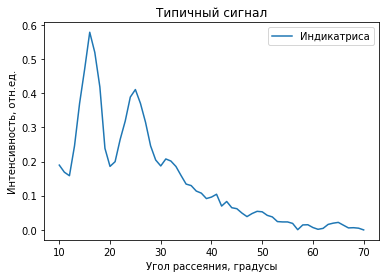

In [9]:
plt.plot(tetta, data_exp.iloc[502,:])

plt.title("Типичный сигнал")
plt.legend(["Индикатриса"])
#plt.axis([2.9,6,2.4,6])
plt.xlabel("Угол рассеяния, градусы")
plt.ylabel("Интенсивность, отн.ед.")

plt.savefig("indiatix.svg",format = 'svg')
plt.show()

In [10]:
ref_points = np.logspace(3,np.log(200337)/np.log(10) + 0.001,30).astype('int64')

In [11]:
with open('data3.pickle', 'rb') as f:
    data_new = pickle.load(f)
mod_samples, exp_samples = data_new

In [12]:
mod_samples = np.array(mod_samples)
exp_samples = np.array(exp_samples)

Поиск коэффциента в ускорении (сравнения)

In [13]:
#ball_times, brute_times, ball_comps, brute_comps
#3 шт.
mod_comps = np.log10(np.mean(mod_samples[:, 2], axis = 0)/1000)
exp_comps =np.log10(np.mean(exp_samples[:, 2], axis = 0)/1000)
brute_comps =np.log10(np.mean(exp_samples[:, 3], axis = 0)/1000)

loged_ref_points = np.log10(ref_points)

In [14]:
first_p = 10
#это для эксперимента
z1 = np.polyfit(loged_ref_points[first_p:],exp_comps[first_p:],1)
p1 = np.poly1d(z1)
print(p1)
# Это для модели
z2 = np.polyfit(loged_ref_points[first_p:],mod_comps[first_p:],1)
p2 = np.poly1d(z2)
print(p2)

 
0.4906 x + 1.356
 
0.4941 x + 1.201


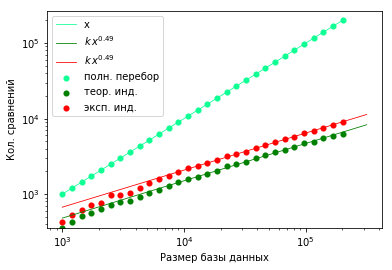

In [15]:
points_for_line = np.array([3,5.5])
plt.scatter(10**loged_ref_points, 10**brute_comps, linewidths=0.1, c ='#0fff95')
plt.scatter(10**loged_ref_points, 10**mod_comps, linewidths=0.1, c ='green')
plt.scatter(10**loged_ref_points, 10**exp_comps, linewidths=0.1, c ='red')
plt.plot(10**loged_ref_points, 10**brute_comps, c ='#0fff95', linewidth=0.8)
plt.plot(10**points_for_line, 10**p2(points_for_line),c ='green', linewidth=0.8)
plt.plot(10**points_for_line, 10**p1(points_for_line),c ='red', linewidth=0.8)
plt.legend(["x","$k\,x^{" + str(p2[1])[:4] + "}$",
            "$k\,x^{" + str(p1[1])[:4]+ "}$",
           "полн. перебор", "теор. инд.","эксп. инд."])
#plt.axis([2.9,6,2.4,6])
plt.xlabel("Размер базы данных")
plt.ylabel("Кол. сравнений")

plt.xscale("log")
plt.yscale("log")

plt.savefig("comps for dif size.svg",format = 'svg')
plt.show()

Поиск коэффциента в ускорении (скорость)

In [16]:
mod_times = np.log10(np.mean(exp_samples[:, 1], axis = 0)/np.mean(mod_samples[:, 0], axis = 0))
exp_times =np.log10(np.mean(exp_samples[:, 1], axis = 0)/np.mean(exp_samples[:, 0], axis = 0))

In [17]:
first_p = 15
#это для эксперимента
z1 = np.polyfit(loged_ref_points[first_p:],(exp_times)[first_p:],1)
p1 = np.poly1d(z1)
print(p1)
# Это для модели
z2 = np.polyfit(loged_ref_points[first_p:],(mod_times)[first_p:],1)
p2 = np.poly1d(z2)
print(p2)

 
0.5079 x - 1.622
 
0.5035 x - 1.459


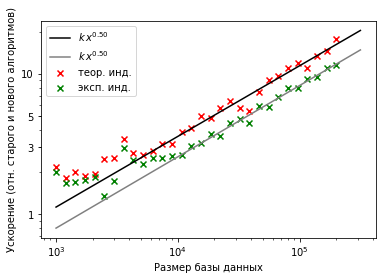

In [18]:
from matplotlib.ticker import ScalarFormatter

ax = plt.figure().add_subplot(111)
ax.ticklabel_format(scilimits = (0,0))

points_for_line = np.array([3,5.5])
plt.plot(10**points_for_line, 10**p2(points_for_line),c ='black')
plt.plot(10**points_for_line, 10**p1(points_for_line),c ='gray')
plt.scatter(10**loged_ref_points, 10**mod_times,marker = 'x', linewidths=0.1, c ='red')
plt.scatter(10**loged_ref_points, 10**exp_times,marker = 'x', linewidths=0.1, c ='green')
plt.legend(["$k\,x^{" + str(p2[1])[:4] + "}$",
            "$k\,x^{" + str(p1[1])[:4] + "}$","теор. инд.","эксп. инд."])
#plt.axis([2.9,6,2.4,6])
plt.xlabel("Размер базы данных")
plt.ylabel("Ускорение (отн. старого и нового алгоритмов)")

plt.xscale("log")
plt.yscale("log",)
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.yticks([1,3, 5,10])

plt.savefig("time for dif size.svg",format = 'svg')
plt.show()

Ошибки в оценки ускорения

Коэффициент ускорения

In [19]:
mod_times = []
exp_times = []
brute_times = []
for i in range(len(mod_samples)):
    mod_times.append(mod_samples[i][0])
    exp_times.append(exp_samples[i][0])
    
    brute_times.append(exp_samples[i][1])
    brute_times.append(mod_samples[i][1])

exp_times = np.array(exp_times)
mod_times = np.array(mod_times)
brute_times = np.array(brute_times)

In [20]:
brute_times_mean = np.mean(brute_times, axis =0)

exp_times_std = np.std(exp_times, axis=0)
mod_times_std = np.std(mod_times, axis=0)

exp_times_mean = np.mean(exp_times, axis=0)
mod_times_mean = np.mean(mod_times, axis=0)

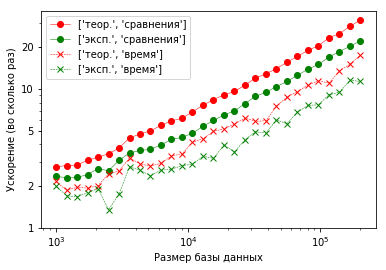

In [21]:
ax = plt.figure().add_subplot(111)
plt.plot(ref_points,10**brute_comps/10**mod_comps, 'o-', c = 'red', linewidth = 0.5)
plt.plot(ref_points,10**brute_comps/10**exp_comps, 'o-', c = 'green', linewidth = 0.5)

plt.plot(ref_points,brute_times_mean/mod_times_mean, 'x--', c = 'red', linewidth = 0.5)
plt.plot(ref_points,brute_times_mean/exp_times_mean, 'x--', c = 'green', linewidth = 0.5)


plt.xlabel("Размер базы данных")
plt.ylabel("Ускорение (во сколько раз)")

plt.xscale("log")
plt.yscale("log")

plt.legend([["теор.","сравнения"],["эксп.", "сравнения"],["теор.", "время"],["эксп.", "время"]])
plt.yticks([1, 2, 5, 10, 20])
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.savefig("comparation.svg",format = 'svg')
plt.show()

Запуск dll

In [22]:
#construct data in style of dll 
all_data_for_dll = np.concatenate((data1.iloc[:,:4],data1.iloc[:,4+10:4+71]),axis =1)
from ctypes import *

lib = CDLL("test_dll_creation.dll")
build_tree = lib.build_tree
c_probs = lib.c_probs
c_probs_fast = lib.c_probs_fast

#create all needed arrays()
centers = np.zeros((all_data_for_dll.shape[0],4), dtype=np.double).tobytes()
indicatrix = np.zeros((all_data_for_dll.shape[0],61), dtype=np.double).tobytes()
dist_s = np.zeros((all_data_for_dll.shape[0]), dtype=np.double).tobytes()
weights = np.zeros((all_data_for_dll.shape[0]), dtype=np.int).tobytes()
closest = np.zeros((61),dtype=np.double).tobytes()

In [23]:
def measure_dll_time(bd_size):
    #build tree fuction
    #func(double* data, int32_t number_points, int32_t hiden_size, int32_t mesured_size, int32_t save, int32_t use_saved)
    bd_size = min(all_data_for_dll.shape[0], bd_size)
    print("testing for ", bd_size)
    build_tree(all_data_for_dll.tobytes(), c_int(bd_size), 4, 61, 1, 0)
    
    #c_probs_fast(int number_points, int hiden_size, int mesured_size,
    #double* measure, double* centers, double* dist_s, int* weights, double* closest,
    #double ratio_perm, int is_buid_tree, bool load, int max_clust_num)
    start_time = time.clock()
    for i in range(data_exp.shape[0]):
        measure = data_exp.values[i]
        c_probs_fast(all_data_for_dll.shape[0], 4, 61, measure.tobytes(), centers, 
                dist_s, weights, closest, c_double(1), 1, 0, all_data_for_dll.shape[0])

    end_time = time.clock()
    return end_time - start_time

In [24]:
1

1

In [25]:
data_realtimes = pd.read_excel("tests_with_Labview_2.xlsx")
xticks = data_realtimes.iloc[7,1:7].astype(int).values / 1.1

dll_times = [measure_dll_time(int(i)) for i in xticks]

testing for  4545
testing for  9090
testing for  18181
testing for  45454
testing for  90909
testing for  181818


Оценка времен в разных реализациях

In [26]:
data_realtimes = pd.read_excel("tests_with_Labview_2.xlsx")

speedup_nostat = np.array([np.array(s.split(',')) for s in data_realtimes.iloc[5,1:7]], dtype=np.float)
speedup_nostat_mean = np.mean(speedup_nostat,axis = 1)*10

speedup_withstat = np.array([np.array(s.split(',')) for s in data_realtimes.iloc[3,1:7]], dtype=np.float)
speedup_withstat_mean = np.mean(speedup_withstat,axis = 1)*10

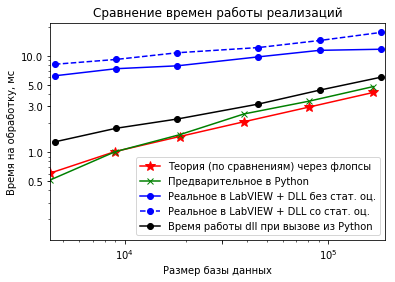

In [27]:
ax = plt.figure().add_subplot(111)

each = 4
mc = 10**-3
Oper_time = 61*15/(1.8*10**9)/mc

plt.plot(10**loged_ref_points[::each], 10**exp_comps[::each]*Oper_time, '*-', c ='red', markersize = 10)
plt.plot(10**loged_ref_points[::each], exp_times_mean[::each], 'x-',  c ='green')
plt.plot(xticks, speedup_nostat_mean, 'o-', c ='blue')
plt.plot(xticks, speedup_withstat_mean, 'o--', c ='blue')
plt.plot(xticks, dll_times, 'o-', c ='black')

plt.title('Сравнение времен работы реализаций')
plt.legend(["Теория (по сравнениям) через флопсы", "Предварительное в Python",
            "Реальное в LabVIEW + DLL без стат. оц.", "Реальное в LabVIEW + DLL со стат. оц.",
           "Время работы dll при вызове из Python"])
plt.xlabel("Размер базы данных")
plt.ylabel("Время на обработку, мс")

ax.set_xlim(left = 10**loged_ref_points[::each][2])
plt.xscale("log")
plt.yscale("log")
plt.yticks([0.5, 1,3, 5, 10])
plt.xticks([10**4, 3*10**4, 10**5])
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.savefig("times comparation.svg",format = 'svg')
plt.show()